In [41]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
# Commonly used modules
import numpy as np
import os
import sys
 
# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import cv2
import IPython
from six.moves import urllib
 
print(tf.__version__)

2.5.0


In [42]:
filename = 'openloop_final'
data = pd.read_csv(r'C:\Users\Administrator\Desktop\openloop_final.csv')

In [43]:
train_feature= data.columns[0:10]
train_featuress = data[train_feature]
train_mean = np.mean(train_featuress, axis=0)
train_std =  np.std(train_featuress, axis=0)                             # get np. std(standardad deviation of input features)
train_featuress = (train_featuress-train_mean)/train_std
train_featuress['Si'].fillna(0, inplace=True)
train_featuress['Shco'].fillna(0, inplace=True) 
train_features=train_featuress.head(1000)
test_features=train_featuress.iloc[1000:]
print(test_features)
train_lable = data.columns[10:28]
train_labelss = data[train_lable]
test_labelss=train_labelss.iloc[1000:]
trains_mean=np.mean(train_labelss,axis=0)
trains_std=np.std(train_labelss,axis=0)
train_labelss=(train_labelss-trains_mean)/trains_std
train_labelss['Si_e'].fillna(0, inplace=True)
train_labels=train_labelss.head(1000)
test_label=train_labelss.iloc[1000:]
print(test_label)

            Ss   Si       Snh      Spo4  Shco        Xi        Xs        Xh  \
1000  1.608406  0.0  1.646572  1.646572   0.0 -0.465284 -1.439094 -1.172541   
1001  2.198112  0.0  2.139469  2.139469   0.0 -0.068391 -1.161784 -0.851247   
1002  2.709684  0.0  2.557422  2.557422   0.0  0.349847 -0.896552 -0.532003   
1003  2.969995  0.0  2.738940  2.738940   0.0  0.866827 -0.592417 -0.154319   
1004  2.913553  0.0  2.695559  2.695559   0.0  1.272671 -0.183587  0.263606   
...        ...  ...       ...       ...   ...       ...       ...       ...   
1340  0.563150  0.0  0.540434  0.540434   0.0  0.079927  0.110723  0.103920   
1341  0.359702  0.0  0.345929  0.345929   0.0  0.040220  0.151441  0.120709   
1342  0.228703  0.0  0.184434  0.184434   0.0  0.001476  0.166568  0.119428   
1343  0.122556  0.0  0.075765  0.075765   0.0 -0.051911  0.164156  0.101229   
1344 -0.087001  0.0  0.070289  0.070289   0.0  0.591077  0.630405  0.633729   

          Xtss        Fr  
1000 -1.172544  1.071827

In [44]:
def build_model():
    model = keras.Sequential([
        Dense(90, activation="relu" , input_shape=train_features.shape ),
        Dense(70),
        Dense(50),
        Dense(60),
        Dense(40),
        Dense(18)
    ])

    model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),            
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

In [45]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
 
model = build_model()        #call the build_model function
 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2000) 
history = model.fit( train_features,train_labels , epochs= 1000, verbose=0, validation_split =0.3,
                    callbacks=[early_stop, PrintDot()])
 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
 
# show RMSE
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

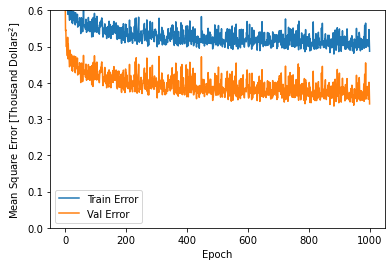

In [46]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], np.sqrt(hist['val_mae']), label='Train Error')
    plt.plot(hist['epoch'], np.sqrt(hist['val_mse']), label = 'Val Error')
    plt.legend()
    plt.ylim([0,.6])
    
plot_history()

In [47]:
print(np.mean(hist['val_mse']))

0.15608203356713057


In [48]:
#print(test_labelss)
test_label=test_label*trains_std+trains_mean
test_label

,So_e,Ss_e,Si_e,Snh_e,Sno_e,Sn_e,Spo4_e,Shco_e,Xi_e,Xs_e,Xh_e,Xsto_e,Xpaoi_e,Xpp_e,Xpha_e,Xa_e,Xtss_e,Fr_e
1000,3.702395,0.119961,30.0,0.826330,8.246774,31.493598,0.033327,3.991792,1676.747744,23.306414,1249.690095,8.326031,963.855258,138.842184,64.939248,133.958766,3880.218758,76886.40736
1001,3.618836,0.118780,30.0,0.914755,8.091660,31.388188,0.034123,4.019487,1673.114054,23.016442,1246.615084,8.217304,962.056345,138.614967,63.695802,133.681542,3871.094750,79237.30636
1002,3.471403,0.118737,30.0,1.076915,7.990120,31.203383,0.035938,4.044853,1666.978750,22.910367,1241.739253,8.160870,958.809615,138.199597,62.503333,133.218438,3856.595610,81372.52321
1003,3.251214,0.120133,30.0,1.351287,7.957937,30.927334,0.040623,4.066582,1656.845113,23.021462,1233.955584,8.160736,953.248736,137.480266,61.376674,132.451612,3833.378918,83606.54530
1004,2.964026,0.123288,30.0,1.779801,8.009492,30.558104,0.053071,4.083099,1641.720725,23.387179,1222.506464,8.221849,944.780453,136.377453,60.365845,131.299017,3799.214953,83869.65762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2.388657,0.194651,30.0,2.846596,10.844564,29.852438,3.591504,3.764675,1564.194399,34.708700,1138.633063,9.845707,901.042367,134.087646,34.954485,126.755808,3608.952202,72749.14275
1341,2.345481,0.196559,30.0,3.064505,10.851201,29.809895,3.785185,3.764317,1561.245635,34.976014,1136.561537,9.944769,899.158082,133.721856,35.317722,126.540014,3602.282539,72216.20009
1342,2.309081,0.198526,30.0,3.272582,10.869090,29.766089,3.972182,3.762574,1558.305429,35.253966,1134.495801,10.040216,897.278646,133.358569,35.684315,126.324873,3595.645364,71811.94189
1343,2.278779,0.200541,30.0,3.466616,10.894755,29.721597,4.146490,3.759934,1555.393354,35.541046,1132.449964,10.130189,895.413926,133.003457,36.040711,126.111409,3589.085799,71359.31966


In [49]:
ynew = model.predict(test_features)
ynew=np.array(ynew)
trains_std=np.array(trains_std)
trains_mean=np.array(trains_mean)
trains_std=trains_std.reshape(1,18)
trains_mean=trains_mean.reshape(1,18)
ynew=ynew*trains_std+trains_mean
print(ynew)

[[3.48580564e+00 1.36087881e-01 3.00000000e+01 ... 1.35970216e+02
  3.92770975e+03 7.70456188e+04]
 [3.27314709e+00 1.47391939e-01 3.00000000e+01 ... 1.34815991e+02
  3.88472975e+03 7.91882614e+04]
 [3.11483729e+00 1.55829817e-01 3.00000000e+01 ... 1.34395357e+02
  3.86671053e+03 8.12768952e+04]
 ...
 [2.13909842e+00 2.08625770e-01 3.00000000e+01 ... 1.26901837e+02
  3.63917966e+03 7.16244744e+04]
 [2.04595000e+00 2.23903322e-01 3.00000000e+01 ... 1.26370357e+02
  3.64086006e+03 7.12355202e+04]
 [1.94636165e+00 2.59532243e-01 3.00000000e+01 ... 1.25586841e+02
  3.57106479e+03 7.44688668e+04]]


In [50]:
print(test_label.shape)

(345, 18)


In [51]:
print(test_labelss)

          So_e      Ss_e  Si_e     Snh_e      Sno_e       Sn_e    Spo4_e  \
1000  3.702395  0.119961    30  0.826330   8.246774  31.493598  0.033327   
1001  3.618836  0.118780    30  0.914755   8.091660  31.388188  0.034123   
1002  3.471403  0.118737    30  1.076915   7.990120  31.203383  0.035938   
1003  3.251214  0.120133    30  1.351287   7.957937  30.927334  0.040623   
1004  2.964026  0.123288    30  1.779801   8.009492  30.558104  0.053071   
...        ...       ...   ...       ...        ...        ...       ...   
1340  2.388657  0.194651    30  2.846596  10.844564  29.852438  3.591504   
1341  2.345481  0.196559    30  3.064505  10.851201  29.809895  3.785185   
1342  2.309081  0.198526    30  3.272582  10.869090  29.766089  3.972182   
1343  2.278779  0.200541    30  3.466616  10.894755  29.721597  4.146490   
1344  2.247106  0.202970    30  3.685253  10.886550  29.674835  4.330574   

        Shco_e         Xi_e       Xs_e         Xh_e     Xsto_e     Xpaoi_e  \
1000  3.9

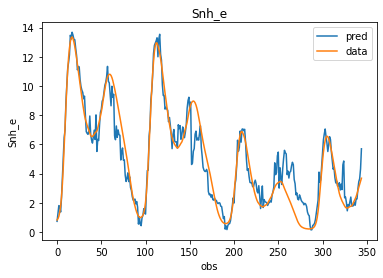

In [52]:
test_label=np.array(test_label)
y_label = ['So_e','Ss_e', 'Si_e', 'Snh_e', 'Sno_e', 'Sn_e', 'Spo4_e', 'Shco_e' , 'Xi_e' , 'Xs_e' ,'Xh_e' , 'Xsto_e' ,'Xpaoi_e' ,'Xpp_e' ,'Xpha_e' , 'Xa_e' , 'Xtss_e','Fr' ]
num=3
char=y_label[num]
def plot_history():
    plt.figure()
    plt.title(char)
    plt.xlabel('obs')
    plt.ylabel(char)
    plt.plot(ynew[:,num], label='pred')
    plt.plot(test_label[:,num], label='data')
   
   
    plt.legend()
    
plot_history()

In [53]:
data["Ttss_e"]=data["Xtss_e"]
data["Tkn_e"]=data["Snh_e"]+0*data["Ss_e"]+0.01*data["Si_e"]+0.07*data["Xh_e"]+0.07*data["Xa_e"]+0.07*data["Xpaoi_e"]+0.035*data["Xs_e"]+0.03*data["Xi_e"]
data["Ntot_e"]=data["Tkn_e"]-5.8181
data["BOD_e"]=0.24*(data["Ss_e"]+data["Xs_e"]+(1-0.2)*data["Xh_e"]+(1-0.2)*(data["Xpha_e"])+(1-0.2)*data["Xpaoi_e"]+(1-0.2)*(data["Xa_e"]))
data["Tptot_e"]=data["Spo4_e"]+0*data["Si_e"]+0.005*data["Xs_e"]+0.01*data["Xi_e"]+0.014*data["Xh_e"]+0.014*data["Xpaoi_e"]+0.014*data["Xa_e"]+data["Xpp_e"]

In [54]:
y_labels = ['So_e','Ss_e', 'Si_e', 'Snh_e', 'Sno_e', 'Sn_e', 'Spo4_e', 'Shco_e' , 'Xi_e' , 'Xs_e' ,'Xh_e' , 'Xsto_e' ,'Xpaoi_e' ,'Xpp_e' ,'Xpha_e' , 'Xa_e' , 'Xtss_e','Fr' ]
z=np.sqrt(np.mean(np.square(ynew-test_label),axis=0))
#z=z.tolist()
z

array([3.38050236e-01, 2.62742958e-02, 0.00000000e+00, 1.08120034e+00,
       4.62399886e-01, 6.70148491e-01, 1.51642285e+00, 9.38707235e-02,
       1.62322837e+01, 4.69256712e+00, 1.96919394e+01, 1.43160321e+00,
       2.61746843e+01, 3.59948214e+00, 1.39763469e+01, 1.19195537e+00,
       6.10309304e+01, 1.46716830e+02])

3.4726127149203676


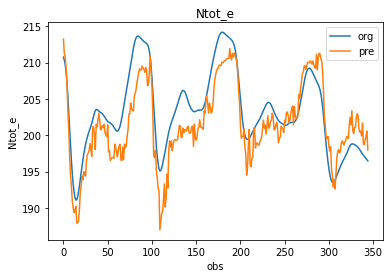

In [55]:
tkn_org=test_label[:,3]+0*test_label[:,1]+0.01*test_label[:,2]+0.07*test_label[:,10]+0.07*test_label[:,15]+0.07*test_label[:,12]+0.035*test_label[:,9]+0.03*test_label[:,8]-5.8181
tkn_pre=ynew[:,3]+0*+ynew[:,1]+0.01*ynew[:,2]+0.07*ynew[:,10]+0.07*ynew[:,15]+0.07*ynew[:,12]+0.035*ynew[:,9]+0.03*ynew[:,8]-5.8181
def plot_history():
    plt.figure()
    plt.title("Ntot_e")
    plt.xlabel('obs')
    plt.ylabel('Ntot_e')
    plt.plot(tkn_org, label='org')
    plt.plot(tkn_pre, label='pre')

    plt.legend()
    
plot_history()
print(np.sqrt(np.mean(np.square(tkn_org-tkn_pre),axis=0)))

9.670063507710733


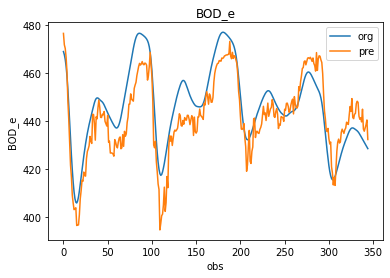

In [56]:
bod_org=0.24*(test_label[:,1]+test_label[:,9]+(1-0.2)*test_label[:,10]+(1-0.2)*(test_label[:,14])+(1-0.2)*test_label[:,12]+(1-0.2)*(test_label[:,15]))
bod_pre=0.24*(ynew[:,1]+ynew[:,9]+(1-0.2)*ynew[:,10]+(1-0.2)*(ynew[:,14])+(1-0.2)*ynew[:,12]+(1-0.2)*(ynew[:,15]))
def plot_history():
    plt.figure()
    plt.title("BOD_e")
    plt.xlabel('obs')
    plt.ylabel('BOD_e')
    plt.plot(bod_org, label='org')
    plt.plot(bod_pre, label='pre')


   
   
    plt.legend()
    
plot_history()    
print(np.sqrt(np.mean(np.square(bod_org-bod_pre),axis=0)))

64.9539214190601


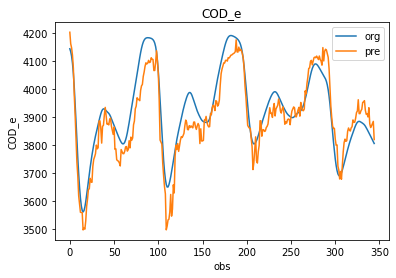

In [57]:
cod_pre=ynew[:,1]+ynew[:,2]+ynew[:,9]+ynew[:,8]+ynew[:,10]+ynew[:,12]+ynew[:,14]+ynew[:,15]
cod_org=test_label[:,1]+test_label[:,2]+test_label[:,9]+test_label[:,8]+test_label[:,10]+test_label[:,12]+test_label[:,14]+test_label[:,15]
def plot_history():
    plt.figure()
    plt.title("COD_e")
    plt.xlabel('obs')
    plt.ylabel('COD_e')
    plt.plot(cod_org, label='org')
    plt.plot(cod_pre, label='pre')

    plt.legend()
    
plot_history()
print(np.sqrt(np.mean(np.square(cod_org-cod_pre),axis=0)))
   

3.252603792633242


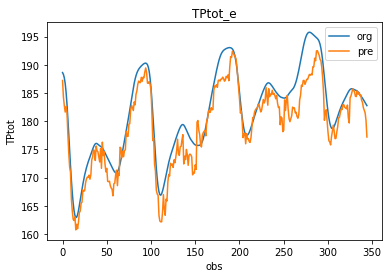

In [58]:
tp_pre=ynew[:,6]+0*ynew[:,2]+0.005*ynew[:,9]+0.01*ynew[:,8]+0.014*ynew[:,10]+0.014*ynew[:,12]+0.014*ynew[:,15]+ynew[:,13]
tp_org=test_label[:,6]+0*test_label[:,2]+0.005*test_label[:,9]+0.01*test_label[:,8]+0.014*test_label[:,10]+0.014*test_label[:,12]+0.014*test_label[:,15]+test_label[:,13]
def plot_history():
    plt.figure()
    plt.title("TPtot_e")
    plt.xlabel('obs')
    plt.ylabel('TPtot')
    plt.plot(tp_org, label='org')
    plt.plot(tp_pre, label='pre')

    plt.legend()
    
plot_history()
print(np.sqrt(np.mean(np.square(tp_org-tp_pre),axis=0)))

In [59]:
means=(np.mean(np.absolute(ynew-test_label),axis=0))
meanq=np.sum(means)
means

array([2.11099960e-01, 2.01507778e-02, 0.00000000e+00, 7.74219140e-01,
       3.64002197e-01, 4.83445803e-01, 1.22276222e+00, 6.96308325e-02,
       1.32144281e+01, 3.53254126e+00, 1.66404881e+01, 1.05017117e+00,
       2.29035349e+01, 2.99200351e+00, 1.10114545e+01, 9.34889092e-01,
       5.09140026e+01, 1.13294942e+02])

In [60]:
import pandas as pd

y_labels = ['So_e','Ss_e', 'Si_e', 'Snh_e', 'Sno_e', 'Sn_e', 'Spo4_e', 'Shco_e' , 'Xi_e' , 'Xs_e' ,'Xh_e' , 'Xsto_e' ,'Xpaoi_e' ,'Xpp_e' ,'Xpha_e' , 'Xa_e' , 'Xtss_e','Fr' ]
x=pd.DataFrame(means,y_labels)
x

,0
So_e,0.211100
Ss_e,0.020151
Si_e,0.000000
Snh_e,0.774219
Sno_e,0.364002
Sn_e,0.483446
Spo4_e,1.222762
Shco_e,0.069631
Xi_e,13.214428
Xs_e,3.532541


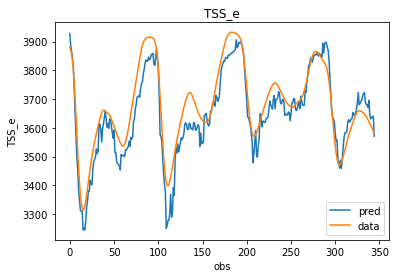

In [62]:
test_label=np.array(test_label)
y_label = ['So_e','Ss_e', 'Si_e', 'Snh_e', 'Sno_e', 'Sn_e', 'Spo4_e', 'Shco_e' , 'Xi_e' , 'Xs_e' ,'Xh_e' , 'Xsto_e' ,'Xpaoi_e' ,'Xpp_e' ,'Xpha_e' , 'Xa_e' , 'Xtss_e','Fr' ]
num=16
char=y_label[num]
def plot_history():
    plt.figure()
    plt.title('TSS_e')
    plt.xlabel('obs')
    plt.ylabel('TSS_e')
    plt.plot(ynew[:,num], label='pred')
    plt.plot(test_label[:,num], label='data')
   
   
    plt.legend()
    
plot_history()